In [18]:
import numpy as np
import pandas as pd

In [19]:
random_seed = np.random.RandomState(12)

In [20]:
# Generate a set of normal observations, to be used as training data
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

# Generate a testing set, also consisting of normal observations
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

# Generate a set of outlier observations. These are generated from a different distribution than the normal observations
X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

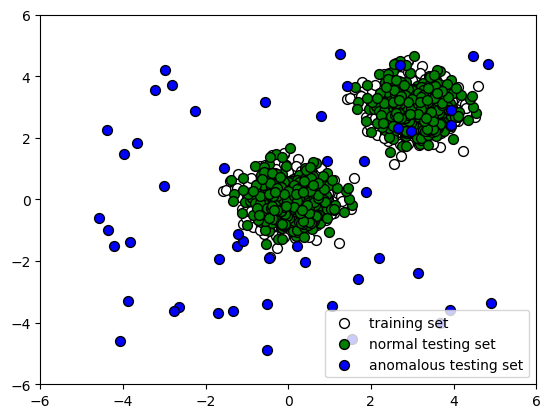

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50,
edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50,
edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50,
edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3], ["training set", "normal testing set", "anomalous testing set"],
           loc="lower right",)
plt.show()


In [22]:
# Now train an Isolation Forest model on our training data:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Let's see how the algorithm performs
X_outliers = X_outliers.assign(pred=y_pred_outliers)
X_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


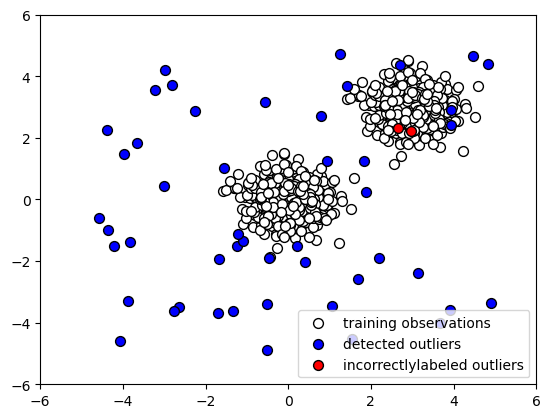

In [23]:
# Let's plot the Isolation Forest predictions on the outliers to see how many it caught:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50,
edgecolor="black")
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ["x"]],
X_outliers.loc[X_outliers.pred == -1, ["y"]], c="blue", s=50, edgecolor="black",)
p3 = plt.scatter(
X_outliers.loc[X_outliers.pred == 1, ["x"]],
X_outliers.loc[X_outliers.pred == 1, ["y"]], c="red", s=50, edgecolor="black",)
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3],
["training observations", "detected outliers", "incorrectlylabeled outliers"], loc="lower right",)
plt.show()

In [24]:
# Now let's see how it performed on the normal testing data. Append the predicted label to X_test:
X_test = X_test.assign(pred=y_pred_test)
X_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


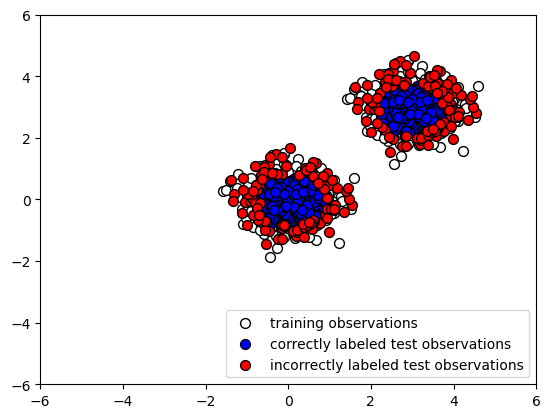

In [25]:
# Now let's plot the results to see whether our classifier labeled the normal testing data correctly:
p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50,
edgecolor="black")
p2 = plt.scatter(
X_test.loc[X_test.pred == 1, ["x"]],
X_test.loc[X_test.pred == 1, ["y"]], c="blue", s=50, edgecolor="black",)
p3 = plt.scatter(
X_test.loc[X_test.pred == -1, ["x"]],
X_test.loc[X_test.pred == -1, ["y"]], c="red", s=50, edgecolor="black",)
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
[p1, p2, p3],
["training observations", "correctly labeled test observations", "incorrectly labeled test observations",], loc="lower right",)
plt.show()